# ANALISIS E INSIGHTS

Vamos a dar respuesta a las preguntas semilla.

## SET UP

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcompletar rápido
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

In [67]:
pd.reset_option('display.max_rows')

## CARGA DE DATOS

In [68]:
con = sa.create_engine('sqlite:///../Datos/airbnb.db')

df = pd.read_sql('df_preparado', con = con)

df.head()

level_0  index      id                                          name  \
0        0      0   35797                                   Villa Dante   
1        1      1  898633  City SkyLine View from 1 Bedroom Apt in CDMX   
2        2      2   44616                             CONDESA HAUS  B&B   
3        3      3  913084            15 blocks from Paseo de la Reforma   
4        4      4   67703             2 bedroom apt. deco bldg, Condesa   

   host_id               alcaldia  latitude  longitude        room_type  \
0   153786  Cuajimalpa de Morelos  19.38283  -99.27178  Entire home/apt   
1  4796027             Cuauhtémoc  19.42063  -99.16586  Entire home/apt   
2   196253             Cuauhtémoc  19.41162  -99.17794  Entire home/apt   
3  4647293         Miguel Hidalgo  19.43956  -99.17263  Entire home/apt   
4   334451             Cuauhtémoc  19.41152  -99.16857  Entire home/apt   

     price  minimum_nights  calculated_host_listings_count  availability_365  \
0   3663.0               1                               1               363   
1   1652.0               3                               3               262   
2  18000.0               1                              13               364   
3    814.0               2                               1               236   
4   1923.0               2                               2               361   

                                         description host_is_superhost  \
0  Dentro de Villa un estudio de arte con futon, ...                 f   
1  The LOCATION is undoubtedly THE BIG advantage ...                 t   
2  A new concept of hosting in mexico through a b...                 t   
3                                               None                 t   
4  Comfortably furnished, sunny, 2 bedroom apt., ...                 t   

   accommodates  bathrooms  bathrooms_text  bedrooms  beds  number_of_reviews  \
0             2        1.0             1.0       1.0   1.0                  0   
1             2        1.0             1.0       1.0   2.0                 56   
2            14        5.5             5.5       5.0   8.0                 64   
3             4        1.0             1.0       2.0   3.0                161   
4             4        1.0             1.0       2.0   2.0                 49   

   review_scores_rating  review_scores_communication  review_scores_location  \
0                   NaN                          NaN                     NaN   
1                  4.95                         4.96                    4.93   
2                  4.58                         4.78                    4.98   
3                  4.75                         4.93                    4.46   
4                  4.90                         4.92                    4.98   

              alcaldia_x  precio_m2  precio_total  ocupacion    bedrooms_disc  \
0  Cuajimalpa de Morelos      51212        3663.0          0           01_Una   
1             Cuauhtémoc      57859        1652.0         28           01_Una   
2             Cuauhtémoc      57859       18000.0          0  04_Cuatro o mas   
3         Miguel Hidalgo      65497         814.0         35           02_Dos   
4             Cuauhtémoc      57859        1923.0          1           02_Dos   

  accommodates_disc beds_disc number_of_reviews_disc   m2  precio_compra  \
0               1-3       0-2                   0-16   50      1792420.0   
1               1-3       0-2                  17-70   50      2025065.0   
2              5-16      4-50                  17-70  150      6075195.0   
3                 4         3                71-1277   70      3209353.0   
4                 4       0-2                  17-70   70      2835091.0   

              alcaldia_y  perc_in    pdi_teo     pdi_xo     pdi_zo     pdi_az  
0  Cuajimalpa de Morelos     27.3  56.551635  22.694269  15.555780  15.510843  
1             Cuauhtémoc     59.2  45.311982  19.585018   3.675045  13.175619  
2             Cuauhtémo

## ANALISIS

### Analisis sobre el precio

**¿Cual es el precio medio? ¿y el rango de precios?¿Y por alcaldías?**

**¿Cual es el ranking de alcaldias por precio medio de alquiler?**

In [69]:
df.ocupacion.value_counts()

ocupacion
0      2805
100    2129
1      1203
26     1125
3       644
       ... 
22       57
96       55
71       53
94       52
74       50
Name: count, Length: 101, dtype: int64

In [70]:
df.precio_total.describe()

count     23996.000000
mean       1605.080360
std        4216.386504
min         400.000000
25%         740.000000
50%        1071.500000
75%        1700.000000
max      352607.500000
Name: precio_total, dtype: float64

Vemos que hay al menos un atípico por la parte de arriba que sesga la media, por tanto vamos a usar la mediana como medida de centralización más fiable.

In [71]:
df.precio_total.median()

1071.5

In [72]:
df.groupby('alcaldia').precio_total.median().sort_values(ascending = False)

alcaldia
Miguel Hidalgo            1344.000000
Cuajimalpa de Morelos     1282.000000
Cuauhtémoc                1200.000000
Álvaro Obregón             975.500000
La Magdalena Contreras     946.673077
Milpa Alta                 897.000000
Benito Juárez              875.000000
Tlalpan                    843.204167
Coyoacán                   800.000000
Iztacalco                  793.000000
Azcapotzalco               745.500000
Venustiano Carranza        700.000000
Iztapalapa                 696.099099
Gustavo A. Madero          680.000000
Xochimilco                 680.000000
Tláhuac                    600.000000
Name: precio_total, dtype: float64

Nos llama la atención el dato de Miguel Hidalgo, vamos a verlo con más detalle a ver qué está pasando.

In [73]:
df.loc[df.alcaldia == 'Miguel Hidalgo'].sort_values('precio_total',ascending = False).head(10)

level_0  index                  id  \
420        420    420             6810612   
9033      9033   9033            50303900   
4083      4083   4083            30043309   
9643      9643   9643            51984334   
18133    18133  18133  943817299144440225   
3937      3937   3937            29217617   
8382      8382   8382            48209768   
4747      4747   4747            33393654   
15876    15876  15876  845591958137976559   
9736      9736   9736            52349882   

                                                    name    host_id  \
420                         Great loft value for groups!   35406862   
9033    Amazing Apartment Monte Athos, Lomas Chapultepec  137132393   
4083                                            Rombo IV  207171317   
9643           Luxury apartment in the heart of Polanco.  408007648   
18133  Panoramic view and accessible 2BR @ Nuevo Polanco   31302298   
3937   DEPTO COMPLETO GRANDE ZONA POLANCO, ANAHUAC I ...  220137622   
8382      Charming Suite 10 feet away Presidente Masaryk  137132393   
4747                 Habitación en Blas Pascal - Polanco  120938169   
15876   Amplia Casa cerca de Polanco a 10 min de Masaryk  316264544   
9736                  Departamento muy grande en Polanco  227518858   

             alcaldia   latitude  longitude        room_type    price  \
420    Miguel Hidalgo  19.431650 -99.194950     Private room  11448.0   
9033   Miguel Hidalgo  19.420050 -99.215180  Entire home/apt  80000.0   
4083   Miguel Hidalgo  19.401665 -99.254776  Entire home/apt  65000.0   
9643   Miguel Hidalgo  19.428768 -99.193321  Entire home/apt  60000.0   
18133  Miguel Hidalgo  19.441693 -99.196419  Entire home/apt  50000.0   
3937   Miguel Hidalgo  19.442370 -99.182480  Entire home/apt  49000.0   
8382   Miguel Hidalgo  19.433420 -99.195010  Entire home/apt  39148.0   
4747   Miguel Hidalgo  19.437220 -99.212470     Private room  30000.0   
15876  Miguel Hidalgo  19.432337 -99.178153  Entire home/apt  29000.0   
9736   Miguel Hidalgo  19.436260 -99.210940  Entire home/apt  28768.0   

       minimum_nights  calculated_host_listings_count  availability_365  \
420                 1                              19               365   
9033                4                              15               180   
4083                2                               2               364   
9643                3                               3               292   
18133               3                               2                89   
3937                3                               1               365   
8382                1                              15               178   
4747                1                               1               179   
15876               1                              21               365   
9736                5                               3               364   

                                             description host_is_superhost  \
420    Welcome to one of the few listings in Polanco ...                 f   
9033   Cozy and luxurious apartment in the most exclu...                 f   
4083   It is a private space,  with a continuous conv...                 f   
9643   Live great moments in a spectacular apartment....                 t   
18133  Recovering from an accident/training? Under tr...                 t   
3937   Apartment with excellent location, three block...                 f   
8382   Charming Suite with one bedroom and one bathro...                 f   
4747   Very well located room with iron palace, Antar...                 f   
15876  Enjoy Casa Anzures. Relax in a themed lodging ...                 f   
9736   240 m2 apartment TV room with 75 inch screen w...                 f   

       accommodates  bathrooms  bathrooms_text  bedrooms  beds  \
420              16       10.0            10.0      10.0  16.0   
9033              4        2.0             2.0       2.0   2.0   
4083              4        8.0            

Vemos que son precios en el entorno de los 30,000 - 80,000 MXN!

Al leer la descripción nos damos cuenta de todos estos precios están definidos por la zona de la CDMX en la que se encuentran, a saber, Polanco.

Lo cual es un insight interesante: 

**Insight 1: Los inmuebles de más alto valor se encuentran en las alcaldías más caras de la ciudad.**

Pero por ejemplo vemos que no hay diferencia de precio mediano entre Gustavo A. Madero y Xochimilco.

Esto nos lleva a comparar el precio mediano por alcaldia con el precio mediano de compra también por alcaldia.

In [74]:
temp = df.groupby('alcaldia')[['precio_total','precio_compra']].median()
temp.sort_values('precio_total', ascending = False)

precio_total  precio_compra
alcaldia                                           
Miguel Hidalgo           1344.000000      2292395.0
Cuajimalpa de Morelos    1282.000000      1792420.0
Cuauhtémoc               1200.000000      2025065.0
Álvaro Obregón            975.500000      1692845.0
La Magdalena Contreras    946.673077      1270220.0
Milpa Alta                897.000000       687610.0
Benito Juárez             875.000000      1658405.0
Tlalpan                   843.204167      1363775.0
Coyoacán                  800.000000      1450015.0
Iztacalco                 793.000000      1067885.0
Azcapotzalco              745.500000      1178345.0
Venustiano Carranza       700.000000      1009750.0
Iztapalapa                696.099099       767795.0
Gustavo A. Madero         680.000000      1002120.0
Xochimilco                680.000000       790965.0
Tláhuac                   600.000000      1037232.0

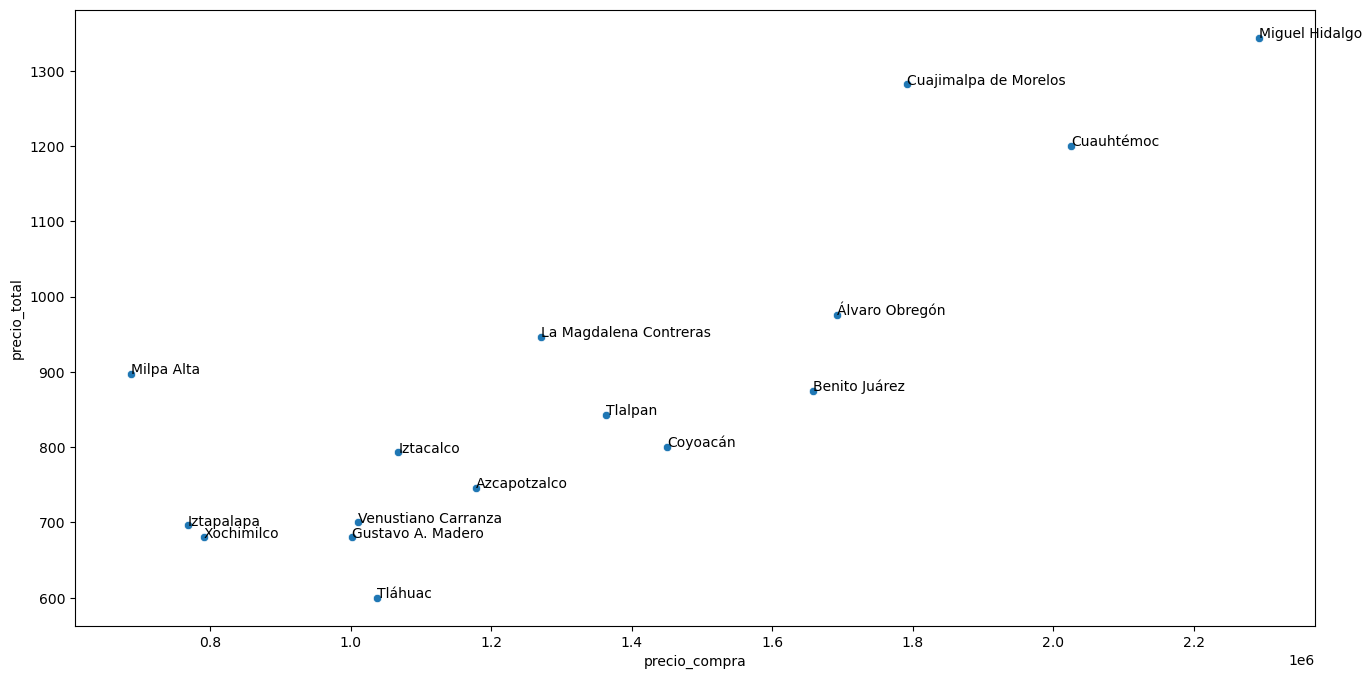

In [75]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada])

Existe una clara correlación entre el precio de compra en cada distrito y el precio que podremos cobrar (excepto por unos casos en particular).

Claramente se perciben tres clusters de bajo-bajo, medio-medio y alto-alto.

Milpa Alta ofrece una relación favorable de precio_compra-precio

También observamos que en ciertas denmarcaciones de la ciudad podemos adquirir inmuebles a menor precio y podemos rentarlos a precios similares a inmuebles en otras locaciones que serían más caros de comprar.

La Magdalena Contreras, Tlalpan, Coyoacán, Cuajimalpa de Morelos.

**Insight 2: Existen ciertas alcaldías que apriori pueden maximizar la relación coste-ingresos y además podemos segmentarlo por el tipo calidad del inmueble en el que nos interese invertir.**

**¿Conviene invertir en la adquisición de inmuebles en cualquier alcaldía de la ciudad?**

In [76]:
temp = df.groupby('alcaldia')[['precio_total','precio_compra','perc_in']].median()
temp.sort_values('perc_in', ascending = False)

precio_total  precio_compra  perc_in
alcaldia                                                    
Tláhuac                   600.000000      1037232.0     66.3
Álvaro Obregón            975.500000      1692845.0     64.1
Iztapalapa                696.099099       767795.0     62.5
Xochimilco                680.000000       790965.0     61.9
Iztacalco                 793.000000      1067885.0     59.6
Cuauhtémoc               1200.000000      2025065.0     59.2
Gustavo A. Madero         680.000000      1002120.0     57.0
La Magdalena Contreras    946.673077      1270220.0     56.1
Milpa Alta                897.000000       687610.0     55.5
Venustiano Carranza       700.000000      1009750.0     55.5
Tlalpan                   843.204167      1363775.0     54.2
Azcapotzalco              745.500000      1178345.0     53.9
Coyoacán                  800.000000      1450015.0     47.0
Miguel Hidalgo           1344.000000      2292395.0     46.4
Cuajimalpa de Morelos    1282.000000      1792420.0     27.3
Benito Juárez             875.000000      1658405.0     15.2

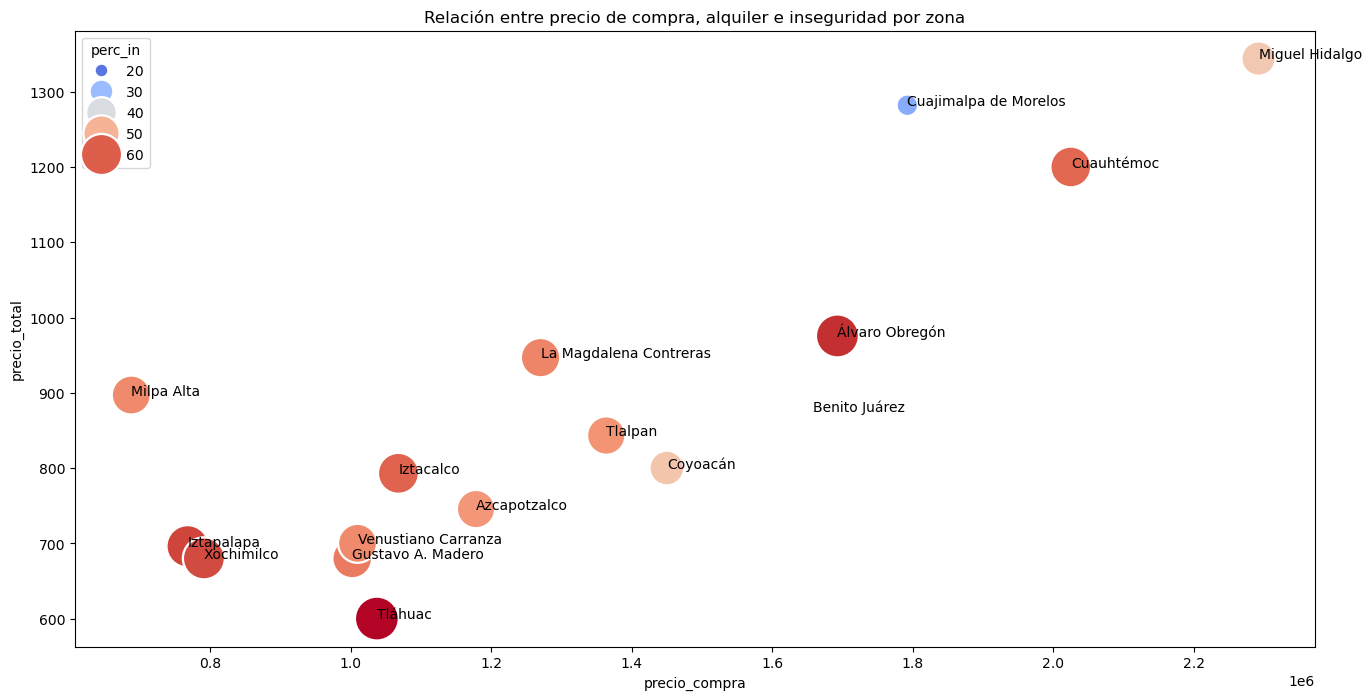

In [77]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=temp, x='precio_compra', y='precio_total', hue='perc_in', size = 'perc_in', palette='coolwarm', sizes=(5, 1000))

# Etiquetas de los puntos
for cada in range(0, temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada])

plt.title("Relación entre precio de compra, alquiler e inseguridad por zona")
plt.show()

Podemos observar que hay opciones que deberíamos de considerar debido al nivel de inseguridad. Podemos identificar alcaldias de la CDMX que representan una mejor inversión a nivel económico-seguridad como lo son:

Milpa Alta, La Magdalena Contreras, Tlalpan, Benito Juárez, Cuajimalpa de Morelos, Miguel Hidalgo.

**Insight 3: Existen ciertas alcaldías que económicamente pueden representar un buen negocio, pero que también están ubicadas en alcaldias inseguras de la ciudad.**

**¿Qué factores (a parte de la localización) determinan el precio del alquiler?**

Para responder a esta pregunta podemos construir un minicubo, ya que hemos discretizado nuestras variables de análisis.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23996 entries, 0 to 23995
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   level_0                         23996 non-null  int64  
 1   index                           23996 non-null  int64  
 2   id                              23996 non-null  int64  
 3   name                            23996 non-null  object 
 4   host_id                         23996 non-null  int64  
 5   alcaldia                        23996 non-null  object 
 6   latitude                        23996 non-null  float64
 7   longitude                       23996 non-null  float64
 8   room_type                       23996 non-null  object 
 9   price                           23996 non-null  float64
 10  minimum_nights                  23996 non-null  int64  
 11  calculated_host_listings_count  23996 non-null  int64  
 12  availability_365                

In [79]:
#Paso 1: Seleccionar qué variables serán la métricas y cuales las dimensiones
metricas = ['precio_total','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc']

minicubo_precio = df[dimensiones + metricas]
minicubo_precio

bedrooms_disc accommodates_disc beds_disc  precio_total  \
0               01_Una               1-3       0-2        3663.0   
1               01_Una               1-3       0-2        1652.0   
2      04_Cuatro o mas              5-16      4-50       18000.0   
3               02_Dos                 4         3         814.0   
4               02_Dos                 4       0-2        1923.0   
...                ...               ...       ...           ...   
23991  04_Cuatro o mas              5-16      4-50        7850.0   
23992           01_Una               1-3       0-2        1478.0   
23993           01_Una               1-3       0-2         936.0   
23994           01_Una                 4       0-2         768.0   
23995           02_Dos                 4       0-2        1302.0   

       precio_compra  
0          1792420.0  
1          2025065.0  
2          6075195.0  
3          3209353.0  
4          2835091.0  
...              ...  
23991      6075195.0  
23992      2025065.0  
23993      2025065.0  
23994      2025065.0  
23995      2835091.0  

[23996 rows x 5 columns]

In [80]:
#Paso 2: pasar a transaccional las dimensiones
minicubo_precio = minicubo_precio.melt(id_vars=['precio_total','precio_compra'])
minicubo_precio

precio_total  precio_compra       variable            value
0            3663.0      1792420.0  bedrooms_disc           01_Una
1            1652.0      2025065.0  bedrooms_disc           01_Una
2           18000.0      6075195.0  bedrooms_disc  04_Cuatro o mas
3             814.0      3209353.0  bedrooms_disc           02_Dos
4            1923.0      2835091.0  bedrooms_disc           02_Dos
...             ...            ...            ...              ...
71983        7850.0      6075195.0      beds_disc             4-50
71984        1478.0      2025065.0      beds_disc              0-2
71985         936.0      2025065.0      beds_disc              0-2
71986         768.0      2025065.0      beds_disc              0-2
71987        1302.0      2835091.0      beds_disc              0-2

[71988 rows x 4 columns]

In [81]:
#Paso 3: Agregar las métricas por "variable" y "valor" con las funciones deseadas
minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')
minicubo_precio

precio_total  precio_compra
variable          value                                       
accommodates_disc 1-3                878.181729      2025065.0
                  4                 1309.241692      2835091.0
                  5-16              1764.000000      2985129.0
bedrooms_disc     00_Cero            880.500000      1417545.5
                  01_Una             878.181729      2025065.0
                  02_Dos            1319.000000      2835091.0
                  03_Tres           1958.000000      3645117.0
                  04_Cuatro o mas   3881.000000      5078535.0
beds_disc         0-2                991.000000      2025065.0
                  3                 1390.000000      2835091.0
                  4-50              1943.000000      3645117.0

Sobre el minicubo vamos analizando cada variable.

In [82]:
minicubo_precio.loc['bedrooms_disc']

precio_total  precio_compra
value                                       
00_Cero            880.500000      1417545.5
01_Una             878.181729      2025065.0
02_Dos            1319.000000      2835091.0
03_Tres           1958.000000      3645117.0
04_Cuatro o mas   3881.000000      5078535.0

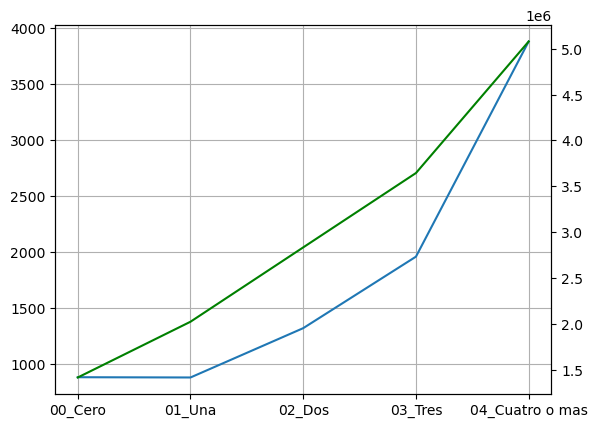

In [83]:
f, ax = plt.subplots()

ax.grid(True)
ax.plot(minicubo_precio.loc['bedrooms_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].precio_compra,color = 'green');

Los inmuebles con cero y una habitación se pueden rentar a precios similares, pero el precio de compra aumenta de cero a una habitación.

**Insight 4: Los inmuebles con cero habitaciones son menos costosos que los de una habitación y proyectan ganancias similares.**

También podemos observar que a partir de tres habitaciones, la gráfica de precio_total muestra un cambio más pronunciado en la tendencia, proyectando un cambio positivo en las ganancias, mientras que la gráfica de compra, si bien también refleja un incremento en el coste de los inmuebles, no muestra un cambio tan pronunciado en su tendencia.

¿Qué categoría de número de habitaciones ofrece más ingreso por cada peso invertido en compra?

In [84]:
#Creamos un dataset provisional
df_ratio = minicubo_precio.loc['bedrooms_disc'].copy()

In [85]:
#Calculamos la relación renta / compra
df_ratio['rendimiento'] = df_ratio['precio_total'] / df_ratio['precio_compra']

In [86]:
df_ratio

precio_total  precio_compra  rendimiento
value                                                    
00_Cero            880.500000      1417545.5     0.000621
01_Una             878.181729      2025065.0     0.000434
02_Dos            1319.000000      2835091.0     0.000465
03_Tres           1958.000000      3645117.0     0.000537
04_Cuatro o mas   3881.000000      5078535.0     0.000764

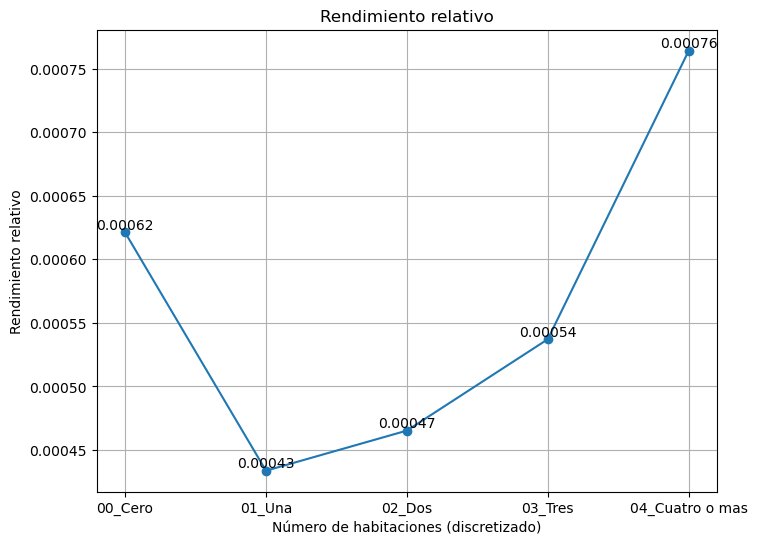

In [87]:
#Graficando 
f, ax = plt.subplots(figsize=(8,6))

ax.plot(df_ratio.index, df_ratio['rendimiento'], marker='o')

ax.grid(True)
ax.set_title('Rendimiento relativo')
ax.set_xlabel('Número de habitaciones (discretizado)')
ax.set_ylabel('Rendimiento relativo')

#Agregando valores encima de los puntos
for i, val in enumerate(df_ratio['rendimiento']):
    ax.text(df_ratio.index[i], val, f"{val:.5f}", ha='center', va='bottom')

plt.show()

Los inmuebles con cero habitaciones presentan, la segunda mejor relación precio_total/precio_compra.

Los inmuebles con una habitación presentan un rendimiento relativo bajo, además de que con una inversión menor podemos adquirir inmuebles con cero habitaciones que presentan un escenario más favorable.

Los inmuebles con dos habitaciones presentan un rendimiento relativo algo bajo.  

Los inmuebles con tres habitaciones presentan un rendimiento relativo un poco más elevado. 

Los inmuebles con cuatro o más habitaciones presentan un rendimiento relativo más favorable, aunque naturalmente, también suponen una inversión mayor.

**Insight 5: Los inmuebles con cero y cuatro o más habitaciones tienen la mejor relación precio_total/precio_compra.**

In [88]:
minicubo_precio.loc['beds_disc']

precio_total  precio_compra
value                             
0-2           991.0      2025065.0
3            1390.0      2835091.0
4-50         1943.0      3645117.0

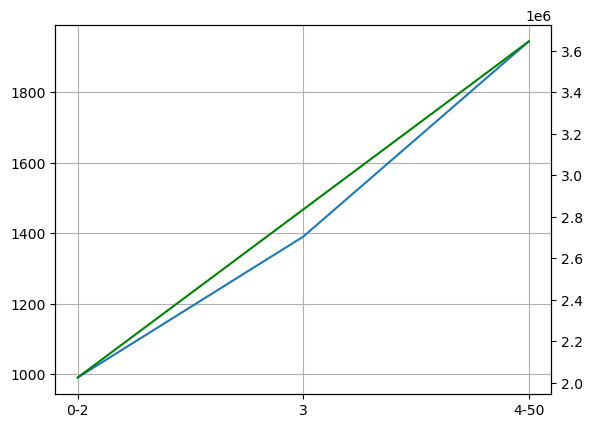

In [89]:
f, ax = plt.subplots()

ax.grid(True)
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra,color = 'green');

El precio de compra crece de manera constante, sin embargo, de 0-2 y 3 camas, la curva de nuestra proyección de ganancias presenta una inclinación menor que cuando hay más de tres camas. 

¿Podría ser que los propietarios estén intentando meter muchas más camas que habitaciones para maximizar el ingreso? 

Veámoslo con los pisos de diferente número de habitaciones:

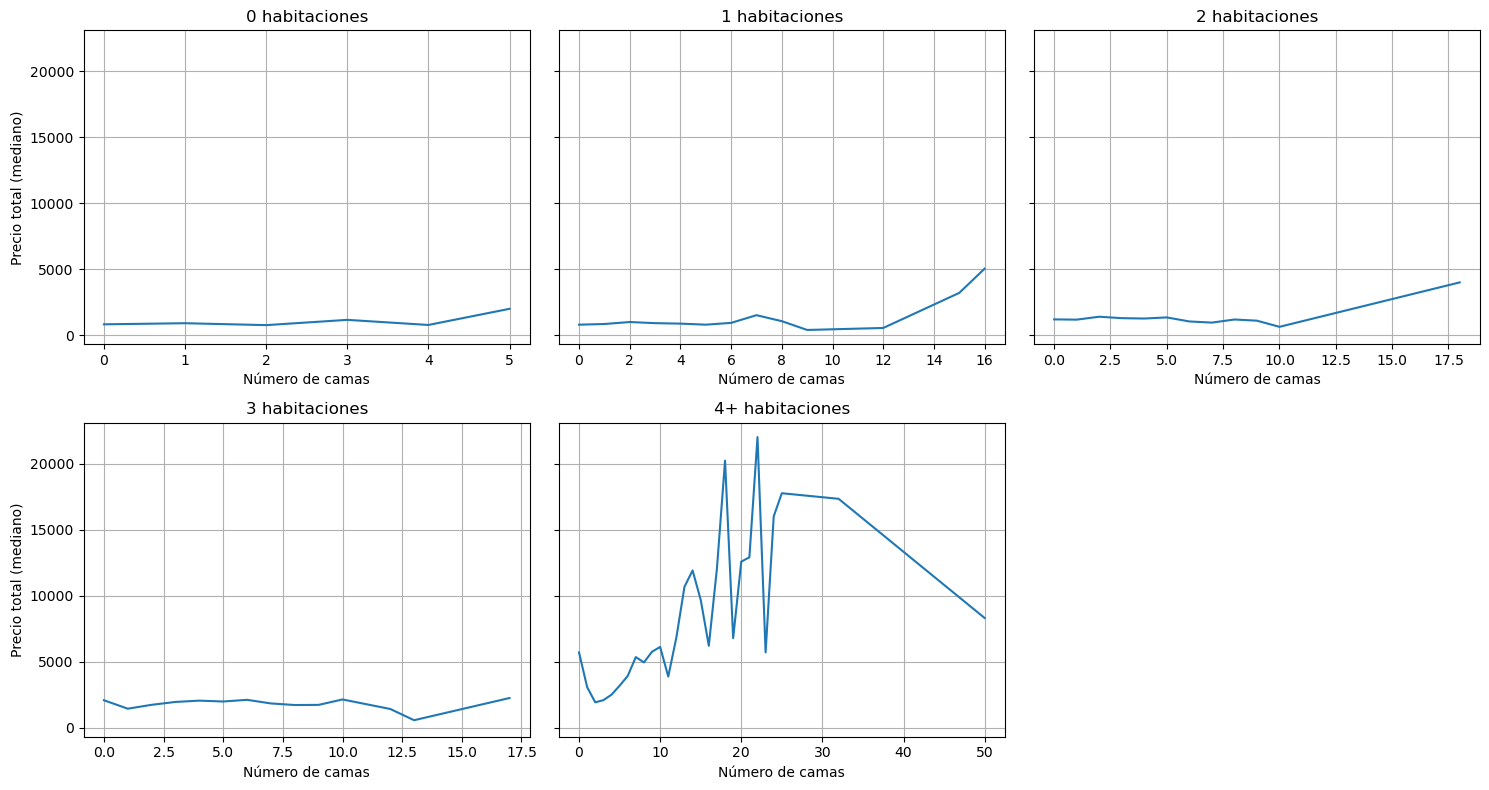

In [90]:
#Definimos las categorías
categorias = {
    "0 habitaciones": df[df.bedrooms == 0],
    "1 habitaciones": df[df.bedrooms == 1],
    "2 habitaciones": df[df.bedrooms == 2],
    "3 habitaciones": df[df.bedrooms == 3],
    "4+ habitaciones": df[df.bedrooms >= 4],
}

#Creamos figura con subplots (en 2 filas, 3 columnas por ejemplo)
fig, axes = plt.subplots(2, 3, figsize=(15,8), sharey=True)

#Convirtiendo la matriz multidimensional de subplots en una matriz 1D para recorrer más fácil cada subplot
axes = axes.flatten()

for i, (titulo, subset) in enumerate(categorias.items()):
    subset.groupby('beds').precio_total.median().plot(ax=axes[i])
    axes[i].set_title(titulo)
    axes[i].set_xlabel("Número de camas")
    axes[i].set_ylabel("Precio total (mediano)")
    axes[i].grid(True)

#Quitando subplot vacío
for j in range(i+1, len(axes)):
   fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Efectivamente aquí hay algo, ya que figura que para pisos de a partir de una habitación hay gente que está metiendo hasta decenas de camas.

¿Realmente la categoría de "4-50" representa un mejor retorno por lo invertido?

In [91]:
#Creando una variable para el rendimiento relativo en función del número de camas

#Dataset provisional
df_ratio = minicubo_precio.loc['beds_disc'].copy()

#Calculamos la relación renta / compra
df_ratio['rendimiento'] = df_ratio['precio_total'] / df_ratio['precio_compra']
df_ratio

precio_total  precio_compra  rendimiento
value                                          
0-2           991.0      2025065.0     0.000489
3            1390.0      2835091.0     0.000490
4-50         1943.0      3645117.0     0.000533

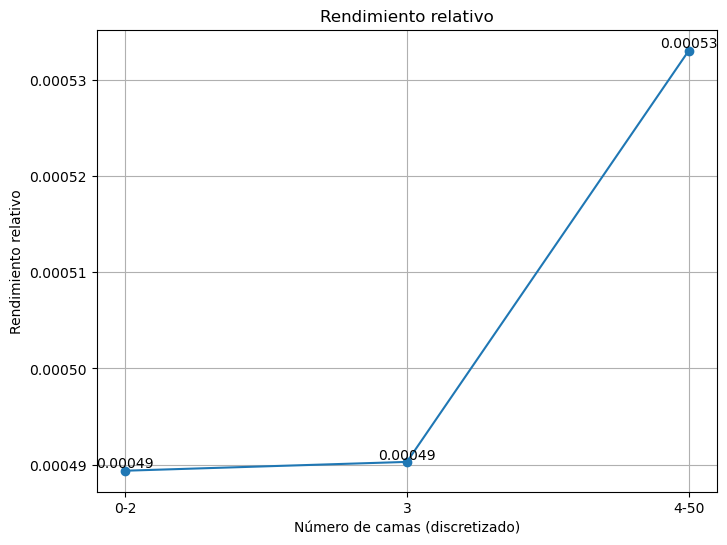

In [92]:
#Graficando 
f, ax = plt.subplots(figsize=(8,6))

ax.plot(df_ratio.index, df_ratio['rendimiento'], marker='o')

ax.grid(True)
ax.set_title('Rendimiento relativo')
ax.set_xlabel('Número de camas (discretizado)')
ax.set_ylabel('Rendimiento relativo')

#Agregando valores encima de los puntos
for i, val in enumerate(df_ratio['rendimiento']):
    ax.text(df_ratio.index[i], val, f"{val:.5f}", ha='center', va='bottom')

plt.show()

Las tres categorías de camas presentan valores casi idénticos de rendimiento relativo, esto es, todas las opciones rinden casi igual, por lo cual sería más recomendable optar por las opción de menor riesgo, que requiere menor inversión inicial y nos va a permitir diversificar, esta sería la categoría de 0-2 camas.

Todavía podemos considerar las otras opciones si aparece algún otro indicador fuerte más adelante.

Vamos a analizar ahora por el número de huéspedes que aceptan.

In [93]:
minicubo_precio.loc['accommodates_disc']

precio_total  precio_compra
value                             
1-3      878.181729      2025065.0
4       1309.241692      2835091.0
5-16    1764.000000      2985129.0

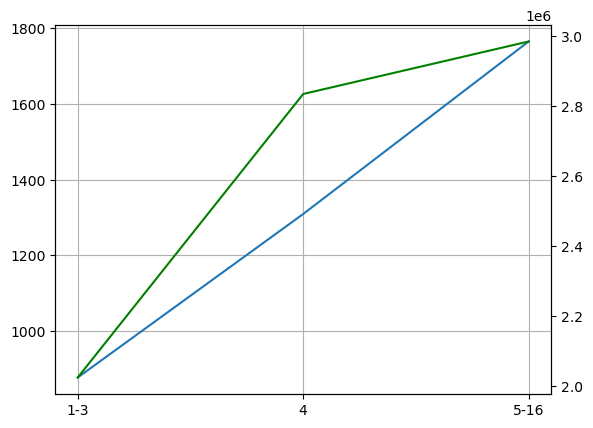

In [94]:
f, ax = plt.subplots()

ax.grid(True)
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra,color = 'green');

La curva de "precio_total" crece de manera consistente conforme aumenta el número de huéspedes.

La curva de "precio_compra" sube de manera más pronunciada de 1-3 y 4 que de 5-16 huéspedes. Así que no podemos decir que el precio de compra sube linealmente con el número de huéspedes.

¿Qué categoría de huéspedes ofrece más ingreso por cada peso invertido en compra?

In [95]:
#Creamos una variable para rendimiento relativo en función del número de huéspedes
df_ratio = minicubo_precio.loc['accommodates_disc'].copy()

#Calculamos el ratio renta / compra
df_ratio['rendimiento'] = df_ratio['precio_total'] / df_ratio['precio_compra']
df_ratio

precio_total  precio_compra  rendimiento
value                                          
1-3      878.181729      2025065.0     0.000434
4       1309.241692      2835091.0     0.000462
5-16    1764.000000      2985129.0     0.000591

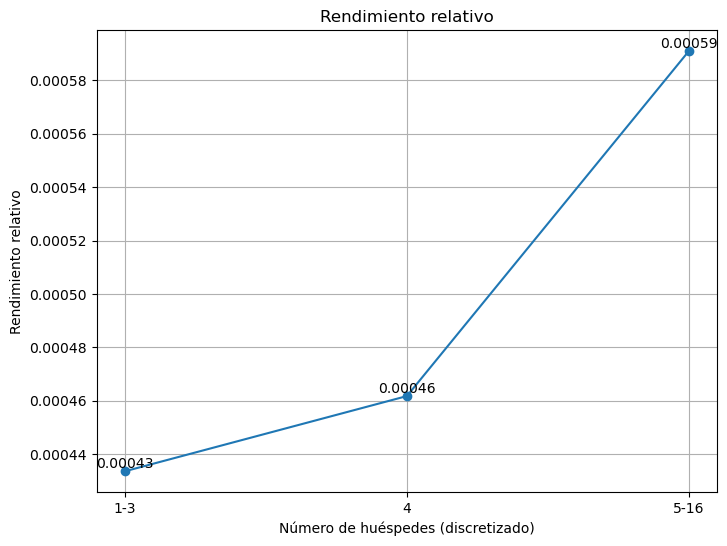

In [96]:
#Graficando
f, ax = plt.subplots(figsize=(8,6))

ax.plot(df_ratio.index, df_ratio['rendimiento'], marker='o')

ax.grid(True)
ax.set_title('Rendimiento relativo')
ax.set_xlabel('Número de huéspedes (discretizado)')
ax.set_ylabel('Rendimiento relativo')

#Agregando valores encima de los puntos
for i, val in enumerate(df_ratio['rendimiento']):
    ax.text(df_ratio.index[i], val, f"{val:.5f}", ha='center', va='bottom')

plt.show()

Las categorías de 1-3 y 4 huéspedes presentan un rendimiento relativo similar, incluso podemos observar que no hay mucha diferencia entre el precio de compra mediano para las últimas dos categorías de esta variable, por lo que invertir en inmuebles que alojen a cuatro huéspedes no resulta rentable.

Los inmuebles con capacidad para alojar de 5-16 personas presentan un mejor rendimiento relativo, aunque no es una gran diferencia.

**Insight 6: El número a evitar es cuatro huéspedes, o invertirmos en inmuebles que alojen de una a tres personas o que alojen más de cuatro.**

Ahora vamos a analizar la variable que hemos construido de cercanía a un punto de interés para ver si tiene efecto sobre el precio de las habitaciones.

Para ello primero vamos a calcular la distancia media por distrito y elegir un punto de corte.

In [97]:
df.groupby('alcaldia').pdi_teo.median().sort_values()

alcaldia
Gustavo A. Madero         37.070767
Venustiano Carranza       39.611831
Iztacalco                 42.040991
Azcapotzalco              42.935338
Cuauhtémoc                45.195448
Iztapalapa                45.616789
Miguel Hidalgo            46.641755
Benito Juárez             48.122043
Tláhuac                   48.866379
Coyoacán                  50.903482
Álvaro Obregón            53.476383
Xochimilco                55.935833
Tlalpan                   56.543270
La Magdalena Contreras    58.125696
Cuajimalpa de Morelos     58.564327
Milpa Alta                58.988511
Name: pdi_teo, dtype: float64

Vamos a cortar en Benito Juárez.

Y sobre esa selección vamos a visualizar con un scatter.

In [98]:
df.groupby('alcaldia').pdi_teo.median().sort_values()[0:8].index.to_list()

['Gustavo A. Madero',
 'Venustiano Carranza',
 'Iztacalco',
 'Azcapotzalco',
 'Cuauhtémoc',
 'Iztapalapa',
 'Miguel Hidalgo',
 'Benito Juárez']

El mismo procedimiento para cada una de las cuatro variables PdI

In [99]:
df.groupby('alcaldia').pdi_xo.median().sort_values()

alcaldia
Xochimilco                 3.094293
Tlalpan                    7.386679
Tláhuac                    7.848942
Milpa Alta                 7.981361
Coyoacán                  11.749237
Iztapalapa                12.510237
La Magdalena Contreras    14.929738
Álvaro Obregón            15.527541
Benito Juárez             16.106597
Iztacalco                 16.270573
Venustiano Carranza       19.304741
Cuauhtémoc                19.547042
Cuajimalpa de Morelos     21.931051
Miguel Hidalgo            22.063419
Gustavo A. Madero         25.056726
Azcapotzalco              25.371654
Name: pdi_xo, dtype: float64

In [100]:
df.groupby('alcaldia').pdi_zo.median().sort_values()

alcaldia
Cuauhtémoc                 3.660388
Venustiano Carranza        4.145270
Iztacalco                  5.759513
Miguel Hidalgo             6.128432
Gustavo A. Madero          6.335308
Benito Juárez              6.443861
Azcapotzalco               6.833199
Iztapalapa                 9.369224
Coyoacán                  10.210574
Álvaro Obregón            11.821444
La Magdalena Contreras    16.449195
Tlalpan                   16.612342
Cuajimalpa de Morelos     17.182120
Tláhuac                   18.029984
Xochimilco                19.506414
Milpa Alta                27.651170
Name: pdi_zo, dtype: float64

In [101]:
df.groupby('alcaldia').pdi_az.median().sort_values()

alcaldia
Tlalpan                    3.243209
Coyoacán                   5.033226
Xochimilco                 6.529458
La Magdalena Contreras     8.289450
Álvaro Obregón             8.327372
Iztapalapa                 8.805913
Benito Juárez              9.527472
Tláhuac                   10.782641
Iztacalco                 12.039760
Cuauhtémoc                13.148392
Venustiano Carranza       14.882884
Cuajimalpa de Morelos     15.002539
Miguel Hidalgo            15.253661
Milpa Alta                15.284093
Azcapotzalco              19.075151
Gustavo A. Madero         20.163480
Name: pdi_az, dtype: float64

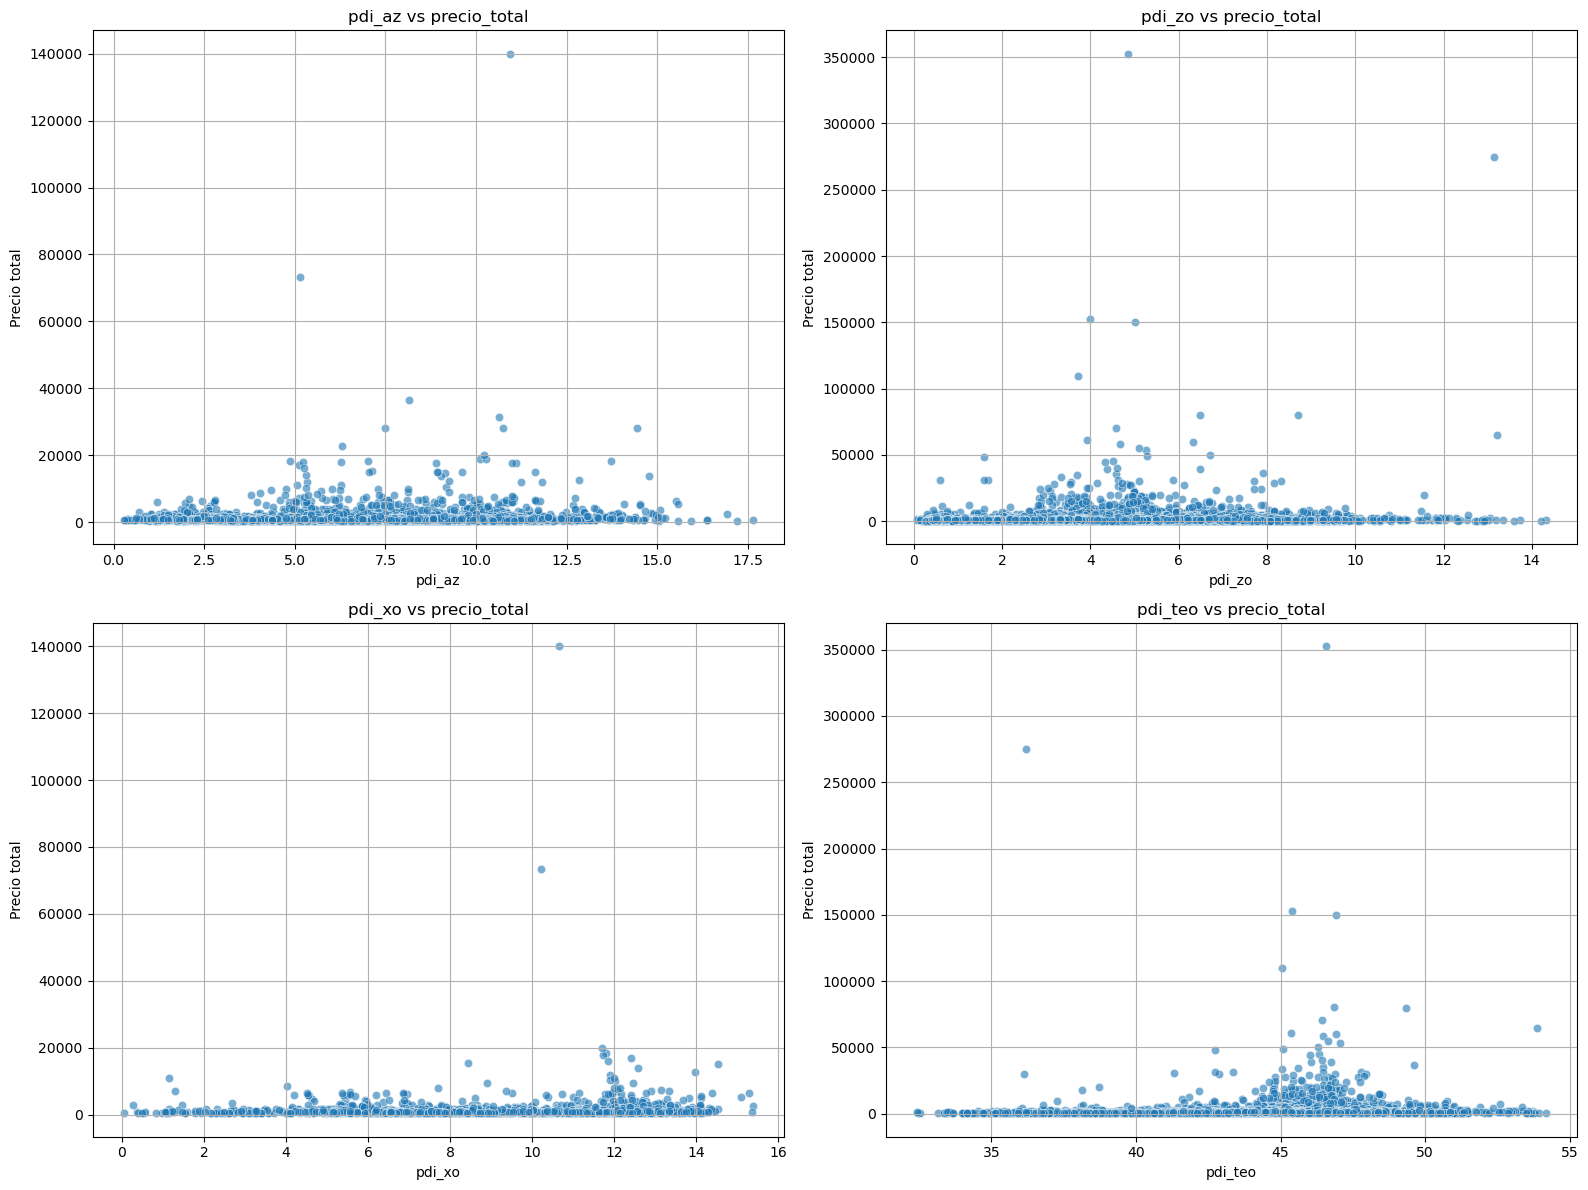

In [102]:
#Variables pdi con su respectiva selección de alcaldías
criterios = {
    "pdi_az": 7,
    "pdi_zo": 7,
    "pdi_xo": 5,
    "pdi_teo": 8
}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, (pdi, n) in enumerate(criterios.items()):
    # Selección específica para cada variable
    seleccion = df.groupby('alcaldia')[pdi].median().sort_values()[0:n].index.to_list()
    
    # Scatterplot
    sns.scatterplot(
        data=df.loc[df.alcaldia.isin(seleccion)],
        x=pdi,
        y="precio_total",
        ax=axes[i],
        alpha=0.6
    )
    
    axes[i].set_title(f"{pdi} vs precio_total")
    axes[i].set_xlabel(pdi)
    axes[i].set_ylabel("Precio total")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

**Insight 7: La cercanía a puntos de interés no tiene tanto impacto como sería esperable. Eso abre la puerta a buscar inmuebles que no necesariamente estén justo al lado del PdI y por tanto esperablemente tengan un precio de compra menor.**

### Analisis sobre la ocupación

* ¿Cual es la ocupación media? ¿Y por alcaldías?
* ¿Cual es el ranking de alcaldías por ocupación?

In [103]:
df.ocupacion.describe()

count    23996.000000
mean        38.606101
std         34.499755
min          0.000000
25%          5.000000
50%         29.000000
75%         69.000000
max        100.000000
Name: ocupacion, dtype: float64

In [104]:
df.ocupacion.mean()

38.60610101683614

In [105]:
df.groupby('alcaldia').ocupacion.mean().sort_values(ascending=False)

alcaldia
La Magdalena Contreras    44.726496
Tlalpan                   43.606154
Venustiano Carranza       43.445141
Benito Juárez             41.694596
Coyoacán                  39.837714
Álvaro Obregón            39.788913
Cuauhtémoc                38.031250
Iztapalapa                37.460870
Iztacalco                 37.084112
Miguel Hidalgo            37.044923
Gustavo A. Madero         36.558266
Cuajimalpa de Morelos     34.903073
Azcapotzalco              33.796875
Xochimilco                33.658537
Tláhuac                   31.352941
Milpa Alta                27.296296
Name: ocupacion, dtype: float64

Milpa Alta tiene la ocupación media más baja.

In [106]:
df.loc[df.alcaldia == 'Milpa Alta'].sort_values('ocupacion', ascending = False).head(10)

level_0  index                   id  \
2751      2751   2751             22655094   
4696      4696   4696             33253579   
5419      5419   5419             37126437   
6139      6139   6139             39840933   
4855      4855   4855             33910274   
17858    17858  17858   934819452890076910   
7339      7339   7339             44552746   
22237    22237  22237  1124435417493956812   
22222    22222  22222  1124033992739538402   
21519    21519  21519  1093623128885375892   

                                                name    host_id    alcaldia  \
2751          Casa de huéspedes San Antonio Tecomitl  160980271  Milpa Alta   
4696                          La Casa de los abuelos  250400517  Milpa Alta   
5419                   Estudio Jardín Imagen Digital  275815535  Milpa Alta   
6139       Casa con vista panorámica y áreas verdes.  306582326  Milpa Alta   
4855       Hospédate en una hermosa finca campestre.  177162332  Milpa Alta   
17858                         Provincia en la Ciudad  428269730  Milpa Alta   
7339   Hermosa Finca campestre rodeada de naturaleza  177162332  Milpa Alta   
22237                                  Standard Room  338374441  Milpa Alta   
22222                                    Deluxe Room  338374441  Milpa Alta   
21519                 Lugar tranquilo y relajado - 2  547848500  Milpa Alta   

        latitude  longitude        room_type        price  minimum_nights  \
2751   19.216550 -98.997920     Private room   425.000000               7   
4696   19.190930 -99.022330     Private room   425.000000               3   
5419   19.203560 -99.013920     Private room   425.000000               3   
6139   19.185910 -99.010330  Entire home/apt  1712.052632               2   
4855   19.210333 -99.079253  Entire home/apt  6700.000000               1   
17858  19.177848 -98.996373  Entire home/apt   600.000000               1   
7339   19.207640 -99.076970  Entire home/apt  4450.000000               1   
22237  19.185658 -99.057686  Entire home/apt  2508.000000               1   
22222  19.187800 -99.078030  Entire home/apt  2400.000000               1   
21519  19.200394 -99.057600     Private room   425.000000               1   

       calculated_host_listings_count  availability_365  \
2751                                1                 0   
4696                                1                 0   
5419                                1                 0   
6139                                1                 0   
4855                                2                86   
17858                               1                90   
7339                                2               266   
22237                               2               270   
22222                               2               270   
21519                               2               269   

                                             description host_is_superhost  \
2751   During the stay for private rooms, you can hav...                 f   
4696   It is very familiar traditional, we are in the...                 f   
5419   the room is made of concrete earthenware with ...                 f   
6139   The property is a one-story house, it is locat...                 f   
4855   Beautiful Hacienda Campestre in Milpa Alta CDM...                 f   
17858  From this central home, the whole group will h...                 f   
7339   Come to relax in contact with nature we have a...                 f   
22237     Take a break and relax in this peaceful oasis.                 f   
22222     Take a break and relax in this peaceful oasis.                 f   
21519  Relax in this home where you can breathe tranq...                 f   

       accommodates  bathrooms  bathrooms_text  bedrooms  beds  \
2751              4        2.0             2.0       2.0   2.0   
4696              4        1.5             1.5       3.0   2.0   
5419              2        1.0             1.0       1.0   1.0   
6139     

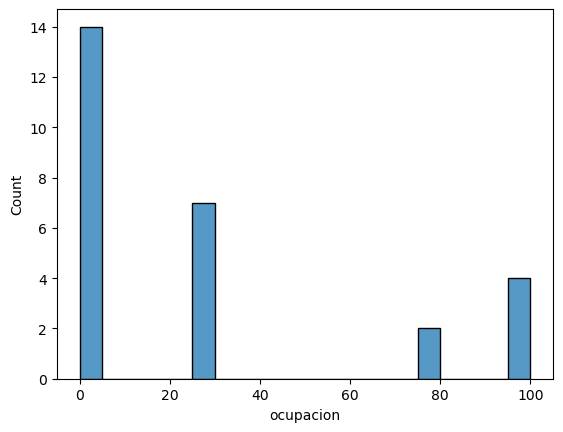

In [107]:
#Histograma para visualizar ocupación de Milpa Alta
sns.histplot(df.loc[df['alcaldia'] == 'Milpa Alta', 'ocupacion'], bins=20)
plt.show()

Contamos con escasos datos para analizar más esta alcaldía, la información con la que contamos nos presenta un escenario desfavorable en cuanto a ocupación.

Vamos a revisar el primer lugar

In [108]:
df.loc[df.alcaldia == 'La Magdalena Contreras'].sort_values('ocupacion', ascending = False).head(10)

level_0  index        id  \
9153     9153   9153  50537634   
5492     5492   5492  37252041   
3785     3785   3785  28338341   
3094     3094   3094  24307368   
3083     3083   3083  24137990   
3052     3052   3052  23897082   
3015     3015   3015  23772159   
2992     2992   2992  23926260   
2940     2940   2940  23413959   
3923     3923   3923  29519405   

                                                   name    host_id  \
9153  Alojamiento para estudiantes con amplió  jardí...  402462732   
5492   CASA COMPLETA PARA GRUPOS O FAMILIAS   3 NIVELES  168051135   
3785     2 rec. nuevas, cerca de Univ. UNAM,  ITAM, TEC  108030706   
3094                                   Alcoba principal  183373010   
3083           Tezca. Departamento con terraza privada.  148082014   
3052                                      Casa gonzalez  179583880   
3015  Casa de DOS  NIVELES-Familias o Grupos Bienven...  168051135   
2992                Estudió Rústico Mexicano con Jardín  179867990   
2940                    Espaciosa Casa con áreas verdes  174594155   
3923     Comfortable, clean room near best Universities  152070116   

                    alcaldia  latitude  longitude        room_type  \
9153  La Magdalena Contreras  19.32564  -99.22936  Entire home/apt   
5492  La Magdalena Contreras  19.31092  -99.26180  Entire home/apt   
3785  La Magdalena Contreras  19.32616  -99.23194     Private room   
3094  La Magdalena Contreras  19.30648  -99.22944     Private room   
3083  La Magdalena Contreras  19.32426  -99.22209  Entire home/apt   
3052  La Magdalena Contreras  19.32013  -99.22936     Private room   
3015  La Magdalena Contreras  19.31062  -99.26043  Entire home/apt   
2992  La Magdalena Contreras  19.31013  -99.24914     Private room   
2940  La Magdalena Contreras  19.29859  -99.24435  Entire home/apt   
3923  La Magdalena Contreras  19.32559  -99.23138     Private room   

            price  minimum_nights  calculated_host_listings_count  \
9153  1204.948276               1                               1   
5492  3000.000000               3                               6   
3785   946.673077              15                               1   
3094   946.673077               7                               1   
3083  1204.948276               2                               1   
3052   946.673077               3                               1   
3015  2480.000000               2                               6   
2992   946.673077               1                               1   
2940  1204.948276               2                               1   
3923   946.673077               2                               1   

      availability_365                                        description  \
9153                 0  Take it easy at this unique and tranquil getaw...   
5492                 0  Enjoy a village atmosphere of the province wit...   
3785                 0                                               None   
3094                 0                       Double bed, private bathroom   
3083                 0  Cozy 1 bedroom apartment with private terrace....   
3052                 0  Lighting bed door and bathroom, full bathrooms...   
3015                 0  ES UN LUGAR IDEAL PARA PRACTICAR ALPINISMO, A ...   
2992                 0  Rustic cabin 15 min from Peripheral and 5 min ...   
2940                 0  Exclusive house, newly finished modern design,...   
3923                 0                                               None   

     host_is_superhost  accommodates  bathrooms  bathrooms_text  bedrooms  \
9153                 f             2        1.5             1.5       1.0   
5492                 f            12        3.0             3.0       4.0   
3785                 f             2        2.0             2.0       2.0   
3094                 f             2        1.0             1.0       1.0   
3083                 t             2        1.0             1.0       1.0   
3052               

La descripción de los lugares es variada, si bien hay lugares dirigidos específicamente para alquiler turístico (nuestro interés), también hay lugares cuyo objetivo es alquiler para estudiantes.

A partir de la información con la que contamos, ¿podemos extraer el tipo de inmueble y el tipo de alquiler que tienen un mayor nivel de ocupación?

In [109]:
#pd.set_option('display.max_rows', None)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23996 entries, 0 to 23995
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   level_0                         23996 non-null  int64  
 1   index                           23996 non-null  int64  
 2   id                              23996 non-null  int64  
 3   name                            23996 non-null  object 
 4   host_id                         23996 non-null  int64  
 5   alcaldia                        23996 non-null  object 
 6   latitude                        23996 non-null  float64
 7   longitude                       23996 non-null  float64
 8   room_type                       23996 non-null  object 
 9   price                           23996 non-null  float64
 10  minimum_nights                  23996 non-null  int64  
 11  calculated_host_listings_count  23996 non-null  int64  
 12  availability_365                

In [111]:
#Seleccionamos hasta 'Álvaro Obregón'
seleccion = df.groupby('alcaldia').ocupacion.mean().sort_values(ascending = False)[0:6].index.to_list()

df_seis = df.loc[df.alcaldia.isin(seleccion)].copy()
df_seis[['name','description', 'minimum_nights', 'alcaldia']]

name  \
6      Beautiful light Studio Coyoacan- full equipped !   
9                                        MARIA DEL ALMA   
10                     Colonial House Downtown Coyoacan   
12                      PLAZA DEL ARCÁNGEL EN SAN ÁNGEL   
18                   Villa Alfonsina, Heart of Coyoacan   
...                                                 ...   
23968                          Aeropuerto Foro Sol TAPÓ   
23969                               Habitación en Renta   
23973                                      Una recámara   
23979                             L´Escala en Casa IAIA   
23982                                Refugio del Jaguar   

                                             description  minimum_nights  \
6      COYOACAN designer studio quiet & safe! well eq...               5   
9                                                   None               1   
10                                                  None               2   
12                                                  None               7   
18     In front of the Frida Kahlo Museum.<br /> Priv...               2   
...                                                  ...             ...   
23968  Your family will be close to everything if you...               1   
23969  This place has a strategic location - it will ...               1   
23973     Take a break and relax in this peaceful oasis.               1   
23979               Room with style and unique location.               1   
23982  Enjoy the simplicity of this quiet and central...               1   

                  alcaldia  
6                 Coyoacán  
9                 Coyoacán  
10                Coyoacán  
12          Álvaro Obregón  
18                Coyoacán  
...                    ...  
23968  Venustiano Carranza  
23969        Benito Juárez  
23973       Álvaro Obregón  
23979        Benito Juárez  
23982             Coyoacán  

[6622 rows x 4 columns]

In [112]:
#pd.reset_option('display.max_rows')

Notamos que hay muchos alquileres turísticos, lo cual es bueno para nosotros, vamos a cuantificar esto para verlo más claro.

In [113]:
df_seis['tipo_alquiler'] = df_seis['minimum_nights'].apply(lambda x: 'Turístico' if x < 10 else 'Largo plazo')

In [114]:
df_seis.groupby('tipo_alquiler').ocupacion.count()

tipo_alquiler
Largo plazo     381
Turístico      6241
Name: ocupacion, dtype: int64

**Insight 8: Los alquileres turísticos son los que tienen mayor ocupación.**

* ¿Qué factores (a parte de la localización) determinan la ocupación?

In [115]:
# Definir métricas y dimensiones
metricas = ['ocupacion']
dimensiones = ['bedrooms_disc', 'accommodates_disc','beds_disc']

minicubo_ocupacion = df[dimensiones + metricas]
minicubo_ocupacion

bedrooms_disc accommodates_disc beds_disc  ocupacion
0               01_Una               1-3       0-2          0
1               01_Una               1-3       0-2         28
2      04_Cuatro o mas              5-16      4-50          0
3               02_Dos                 4         3         35
4               02_Dos                 4       0-2          1
...                ...               ...       ...        ...
23991  04_Cuatro o mas              5-16      4-50          0
23992           01_Una               1-3       0-2          0
23993           01_Una               1-3       0-2          0
23994           01_Una                 4       0-2         30
23995           02_Dos                 4       0-2          3

[23996 rows x 4 columns]

In [116]:
#Paso 2: pasar a transaccional las dimensiones
minicubo_ocupacion = minicubo_ocupacion.melt(id_vars=['ocupacion'])
minicubo_ocupacion

ocupacion       variable            value
0              0  bedrooms_disc           01_Una
1             28  bedrooms_disc           01_Una
2              0  bedrooms_disc  04_Cuatro o mas
3             35  bedrooms_disc           02_Dos
4              1  bedrooms_disc           02_Dos
...          ...            ...              ...
71983          0      beds_disc             4-50
71984          0      beds_disc              0-2
71985          0      beds_disc              0-2
71986         30      beds_disc              0-2
71987          3      beds_disc              0-2

[71988 rows x 3 columns]

In [117]:
#Paso 3: Agregar las métricas por "variable" y "valor" con las funciones deseadas
minicubo_ocupacion = minicubo_ocupacion.groupby(['variable','value'])[['ocupacion']].agg('mean')
minicubo_ocupacion

ocupacion
variable          value                     
accommodates_disc 1-3              38.735624
                  4                38.713281
                  5-16             38.107647
bedrooms_disc     00_Cero          30.485366
                  01_Una           37.633539
                  02_Dos           40.958245
                  03_Tres          40.159896
                  04_Cuatro o mas  34.951372
beds_disc         0-2              39.044344
                  3                38.636058
                  4-50             35.161937

In [118]:
minicubo_ocupacion.loc['bedrooms_disc']

ocupacion
value                     
00_Cero          30.485366
01_Una           37.633539
02_Dos           40.958245
03_Tres          40.159896
04_Cuatro o mas  34.951372

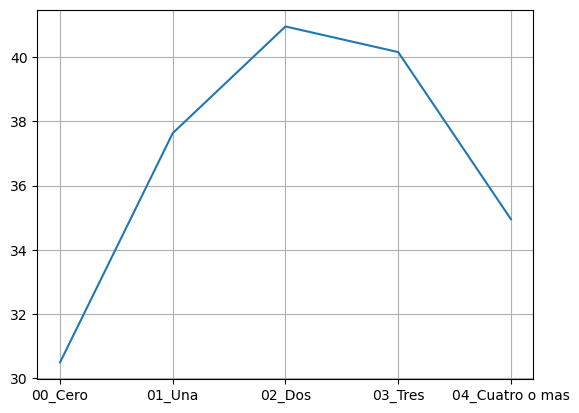

In [119]:
f, ax = plt.subplots()

ax.grid(True)
ax.plot(minicubo_ocupacion.loc['bedrooms_disc'].ocupacion);

Anteriormente vimos que los inmuebles con cero habitaciones tenían un buen rendimiento relativo, sin embargo, aquí vemos que son los que tienen la menor ocupación media.

Los inmuebles con dos y tres y habitaciones son los que tienen mayor ocupación.

Aunque los inmuebles con cuatro o más habitaciones presentaban un buen rendimiento, en este análisis es la segunda categoría con menor ocupación, lo cual podría afectar nuestro rendimiento real (lo mismo con cero habitaciones).

**Insight 9: Los inmuebles con dos y tres habitaciones tienen la ocupación más alta.**

In [120]:
minicubo_ocupacion.loc['accommodates_disc']

ocupacion
value           
1-3    38.735624
4      38.713281
5-16   38.107647

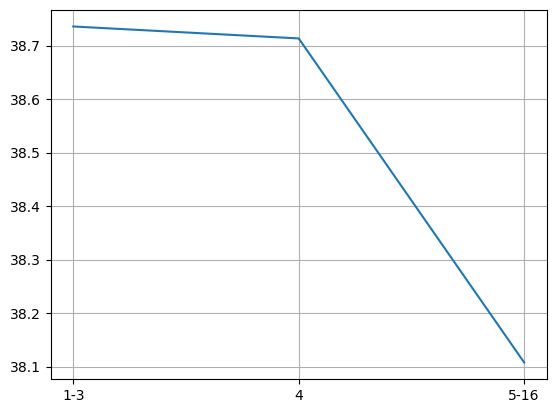

In [121]:
f, ax = plt.subplots()

ax.grid(True)
ax.plot(minicubo_ocupacion.loc['accommodates_disc'].ocupacion);

En el análisis del minicubo de precios concluimos que no sería rentable invertir en inmuebles que alojaran a 4 huéspedes. En cuanto al rendimiento relativo, la categoría "1-3" era la más baja y "5-16" la más alta. 

En este caso la categoría "1-3" presenta mayor ocupación y "5-16" la menor.

Aunque la variación en ocupación en este caso es mínima (de menos del 1%), por lo cual, el número de huéspedes no causa un impacto significativo en la ocupación.

**Insight 10: La cantidad de huéspedes que se pueden alojar no influye de forma significativa en la ocupación.**

In [122]:
minicubo_ocupacion.loc['beds_disc']

ocupacion
value           
0-2    39.044344
3      38.636058
4-50   35.161937

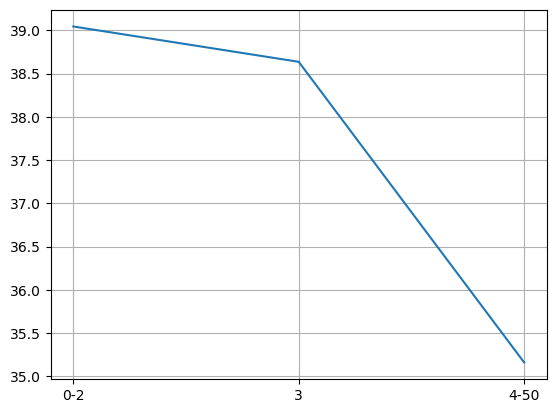

In [123]:
f, ax = plt.subplots()

ax.grid(True)
ax.plot(minicubo_ocupacion.loc['beds_disc'].ocupacion);

"0-2" y "3" camas son las categorías con mayor ocupación media, las cuales tienen valores similares.

La categoría "4-50" camas presenta una menor ocupación en relación con las dos categorías anteriores, 

### Discusión

Beds:
* Las categorías de esta variable presentan un rendimiento relativo similar, por lo que lo mejor sería centrarnos en la categoría que nos requiera menor inversión inicial, mayor oportunidad de diversificar (más propiedades por el mismo capital) y por lo tanto menor riesgo, esta categoría es 0-2 camas.
* Las categorías 0-2 y 3 camas presentan la mejor ocupación.
* Tomando en cuenta los puntos anteriores, la mejor opción es 0-2 camas.

Bedrooms:
* Cero habitaciones tiene el segundo mejor rendimiento relativo, pero también tiene la peor ocupación (hasta un 10% menos que la categoría con mejor ocupación).
* No se recomienda invertir en inmuebles con una habitación.
* Los inmuebles con dos y tres habitaciones presentan un rendimiento relativo similar, también presentan la ocupación más alta. Tomando en cuenta esto, se descartan los inmuebles de tres habitaciones por costos de inversión inicial y posterior rendimiento.
* Los inmuebles con cuatro habitaciones tienen el rendimiento relativo más elevado pero también tienen la segunda peor ocupación (hasta un 5% menos que la categoría con mejor ocupación).

Accommodates:
* No se recomienda invertir en inmuebles para alojar cuatro personas.
* El número de huéspedes no afecta de manera significativa a la ocupación.
* Tenemos que tomar en cuenta la discusión de las variables previas.
* Si queremos tomar decisiones que nos supongan menor riesgo y mayor liquidez, con el potencial de crecer más la rentabilidad del proyecto, lo mejor es invertir en inmuebles para alojar 1-3 personas.

Conclusiones:
* Tenemos que buscar inmuebles donde poner 0-2 camas y alojar de 1-3 personas.
* Hay que decidir si es mejor invertir en inmuebles con cero habitaciones o dos habitaciones, ¿cuál es más rentable y se acopla mejor a nuestros objetivos (menor riesgo, mayor liquidez, potencial de crecimiento)?

### ROI Y PAYBACK PERIOD

Para concluir el análisis de precio y ocupación, vamos a obtener el ROI (Return on Investment) y Payback period.

ROI es un porcentaje que indica qué tan rentable es la inversión en relación a lo invertido. Un mayor ROI representa una mejor inversión.

Payback Period indica el tiempo que tardamos en recuperar la inversión inicial con los ingresos netos anuales.

Los vamos a obtener de la siguiente manera:

$$ ROI = \frac{\text{Ingreso neto anual}}{\text{Precio de compra}} $$


$$ Payback = \frac{\text{Precio de compra}}{\text{Ingreso neto anual}} $$

Donde

$$ \text{Ingreso neto anual} = \text{Precio}_{\text{noche}} \times 365 \times \text{Ocupación} - \text{Costos} $$

Vamos a asumir costos del 25% para obtener el ingreso neto anual.

Para la combinación:

* 0 habitaciones
* 0-2 camas
* 1-3 huéspedes

In [127]:
#Creamos un subset del dataframe con la combinación de categorías que extraimos de los análisis de minicubos
subset = df[(df['bedrooms_disc'] == '00_Cero') &
        (df['beds_disc'] == '0-2') &
        (df['accommodates_disc'] == '1-3')]

precio_total_mediana = subset['precio_total'].median()
precio_compra_mediana = subset['precio_compra'].median()
ocupacion_media = subset['ocupacion'].mean()

#Ingreso anual neto(estimación)
ingreso_anual = precio_total_mediana * (ocupacion_media/100) * 365 * 0.75

#ROI (porcentaje)
roi = ingreso_anual / precio_compra_mediana * 100
print('ROI:', roi)

#Payback (años)
payback = 1 / roi * 100
print('Payback (años):', payback)

ROI: 5.286393043535418
Payback (años): 18.91648978357506


In [128]:
#Creamos un subset del dataframe con la combinación de categorías que extraimos de los análisis de minicubos
subset = df[(df['bedrooms_disc'] == '02_Dos') &
        (df['beds_disc'] == '0-2') &
        (df['accommodates_disc'] == '1-3')]

precio_total_mediana = subset['precio_total'].median()
precio_compra_mediana = subset['precio_compra'].median()
ocupacion_media = subset['ocupacion'].mean()

#Ingreso anual neto(estimación)
ingreso_anual = precio_total_mediana * (ocupacion_media/100) * 365 * 0.75

#ROI (porcentaje)
roi = ingreso_anual / precio_compra_mediana * 100
print('ROI:', roi)

#Payback (años)
payback = 1 / roi * 100
print('Payback (años):', payback)

ROI: 5.349929477455787
Payback (años): 18.69183517677994


* Encontramos que las diferencias en rendimiento relativo y ocupación de las categorías nos proyectan ROIs similares.

### Discusión

Cero habitaciones:
* El precio de compra de estos inmuebles es de la mitad que los inmuebles con dos habitaciones.
* Esto permite diversificar más fácil. Con el capital de un inmueble de dos habitaciones se pueden comprar dos inmuebles de cero habitaciones.
* Tienen la desventaja de que presentan una ocupación menor (30%).
* Menor riesgo en un solo activo.

Dos habitaciones:
* Presentan mayor ocupación, ofreciendo mayor estabilidad.
* Menos flexibilidad para diversificar.

Conclusiones:
* Los inmuebles de cero habitaciones presentan la oportunidad de mayor crecimiento.

* Tenemos un ROI de 5.35%, en el sector inmobiliario se utiliza un ROI del 10% como regla general para considerar un buen rendimiento.
  
    https://ancanaliving.com/blog/how-to-measure-the-success-of-a-real-estate-investment-in-mexico#:~:text=Return%20on%20Investment%20(ROI)%20is%20an%20important%20financial%20measure%20that,the%20profitability%20of%20a%20property.
  
    https://butterflymx.com/blog/roi-real-estate/
* Este ROI está únicamente en función de esta combinación específica de variables. Sin embargo, el resto del análisis nos ha mostrado otras palancas de rentabilidad que aún no están incluidas.
* Los precios de renta no se ven significativamente afectados por la distancia a puntos de interés, por lo que podemos invertir en inmuebles alejados que previsiblemente sean más baratos.
* Si además priorizamos las alcaldías con mayor rendimiento (alta ocupación, menor precio por metro cuadrado, mejor relación compra-renta), se pueden encontrar activos con un ROI rentable.

### Analisis geográfico sobre un mapa

In [129]:
import folium

Vamos a usar las coordenadas del Zócalo que ya teníamos.

Vamos a analizar visualmente el insight sobre la alcaldia de Cuajimalpa de Morelos.

In [130]:
datos_cu = df[df.alcaldia =='Cuajimalpa de Morelos'].copy()
datos_cu['precio_total_disc'] = pd.qcut(datos_cu['precio_total'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

In [131]:
mapa = folium.Map(location=[19.4326018, -99.1332049 ],zoom_start=12)

for piso in range(0,len(datos_cu)):
   folium.CircleMarker(
      location = [datos_cu.iloc[piso]['latitude'], datos_cu.iloc[piso]['longitude']],
      popup = datos_cu.iloc[piso]['precio_total'],
      fill=True,
      color = datos_cu.iloc[piso]['precio_total_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa

El insight 7 nos indica que la cercanía a los puntos de interés no tiene el impacto esperado, además de que económicamente esta alcaldía es muy rentable.

Vamos a visualizar los inmuebles de la alcaldía Benito Juárez

In [132]:
datos_b = df[df.alcaldia =='Benito Juárez'].copy()
datos_b['precio_total_disc'] = pd.qcut(datos_b['precio_total'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

In [133]:
mapa = folium.Map(location=[19.4326018, -99.1332049 ],zoom_start=12)

for piso in range(0,len(datos_b)):
   folium.CircleMarker(
      location = [datos_b.iloc[piso]['latitude'], datos_b.iloc[piso]['longitude']],
      popup = datos_b.iloc[piso]['precio_total'],
      fill=True,
      color = datos_b.iloc[piso]['precio_total_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa